<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 32

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
```
git reset --hard origin/main
```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

# For interacting with the plots:
#%matplotlib notebook

## Outline for today

* Introduction to unsupervised learning: clustering
* k-Means clustering method

**Reading material**: This notebook + (Chapter 21)

## Clustering

Today we will talk about another type of unsupervised learning methods: **clustering**.

* The goal of these methods is to assign similar data points to the same "cluster" or, equivalently, ensure that points that are dissimilar are assigned to different clusters.
    - Note: we will see that each cluster does not need to be a contiguous collection of points (more on that later!)

We will introduce **K-Means clustering**: one of the simplest and most widely used methods of this type.

## K-Means clustering

K-Means clustering is popular because it is relatively scalable (runs on $\mathcal{O}(N)$ time), determines similarity between points according to Euclidean distance to the learned cluster centers $\boldsymbol{\mu}_k \in \mathbb{R}^D$, and it optimizes a well-defined cost function.

As usual, we will start by seeing an example.

### Iris dataset (unsupervised): K-Means clustering example

Like we did in the PCA lecture, let's ignore the output labels of the Iris dataset (making this problem unsupervised).

This means that your dataset $\mathcal{D}$ only contains the input feature data $\mathcal{D}_x$.

In [2]:
import pandas as pd

# Load the Iris dataset.
iris_data = pd.read_csv('../data/data_iris.csv')

# Let's consider our dataset only using the input features:
Data_x = iris_data.loc[:, ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm',] ]
print(Data_x) # Just print the dataframe of the input data (to remind us about the data)

X_data = Data_x.values # save the numpy array of the inputs X (instead of using the pandas Dataframe)

# As usual, it's good practice to scale the data:
# Note: For the PCA method scikit-learn automatically centers the data...
#       So, using StandardScaler is not actually necessary when using PCA. Still, we will do it.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
X_data_scaled = scaler.transform(X_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


Now, let's use scikit-learn to train our first K-Means clustering model on this dataset.

In [3]:
from sklearn.cluster import KMeans # Import K-Means clustering model

np.random.seed(1987)

n_clstrs = 3 # Choose the number of clusters you want to create (hyperparameter)

k_means_model = KMeans(n_clusters=n_clstrs)

k_means_model.fit(X_data_scaled)

labels = k_means_model.labels_ # the predicted label for each data point (cluster to which that point belongs)

Text(0.5, 0.92, 'K-Means clustering of Iris dataset using 3 clusters')

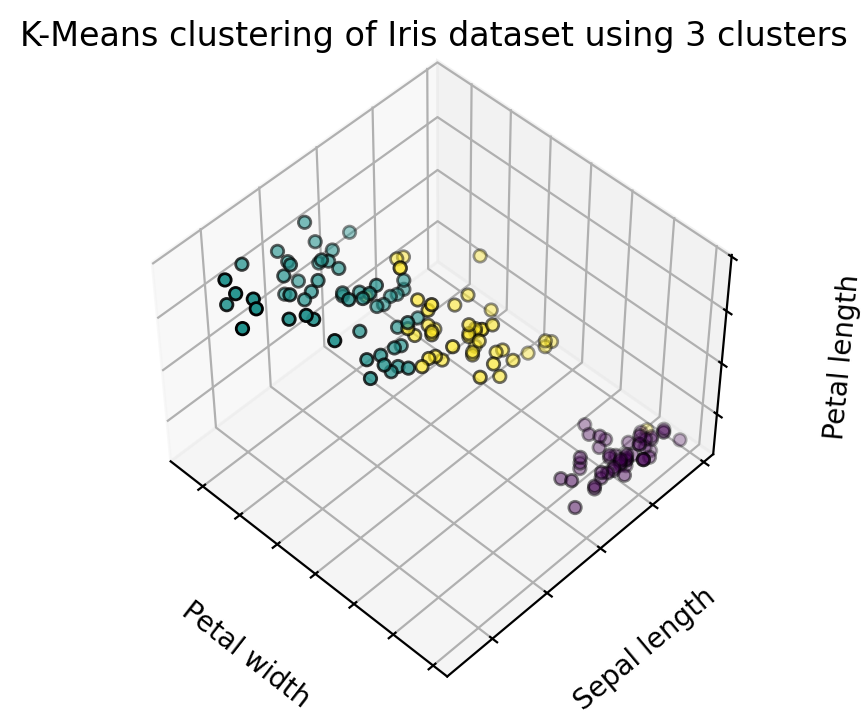

In [4]:
fig1, ax1 = plt.subplots() # This opens a new figure
plt.clf() # clear the figure (otherwise it plots 2D axis)
ax1 = fig1.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134) # Create 3D axes

# Only plot 3 of the 4 features (because we can't visualize things well in 4D):
ax1.scatter(X_data_scaled[:, 3], X_data_scaled[:, 0], X_data_scaled[:, 2], c=labels.astype(float), edgecolor="k")

ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.zaxis.set_ticklabels([])
ax1.set_xlabel("Petal width")
ax1.set_ylabel("Sepal length")
ax1.set_zlabel("Petal length")
ax1.set_title("K-Means clustering of Iris dataset using %1i clusters" % n_clstrs)

## In-class exercise

1. You may have noticed that the previous plot showed the points only considering 3 features (Petal width, Petal length and Sepal length), hence ignoring one input variable (Sepal width) when visualizing the results. Use PCA to replot the previous figure but now using a reduced space of 3 dimensions, i.e. using latent features $\mathbf{u} \in \mathbb{R}^3$


2. Create a second plot on the right of the plot created in Exercise 1 (i.e. create a subplot), where you show the same data but with the correct labels (i.e. knowing the flower type for every point). Compare the plot obtained in Exercise 1 and 2.


Redo Exercise 1 but now train the K-Means model using a different number of clusters: 2 clusters; and 8 clusters.
* When using 2 clusters: you will see that they become the two groups of points you intuitively identified in the last lecture.
* When using 8 clusters: we already know that 8 clusters is too much (after all, there are only 3 flower types!).

In [5]:
# Write your code for In-class Exercise:

# until here.

### K-Means clustering algorithm

When training a K-Means clustering model, we need to decide *a priori* the number of clusters $K$ we want to create ($K$ is a hyperparameter).

The goal is to find the $K$ cluster centers $\boldsymbol{\mu}_k \in \mathbb{R}^D$, so that we can cluster the data by assigning each input data point $\mathbf{x}_n \in \mathbb{R}^D$ to its closest center.

The method corresponds to finding the point estimate (local minimum) of the following cost function:

$$
J(\mathbf{M},\mathbf{U}) = \sum_{n=1}^N \lVert \mathbf{x}_n-\boldsymbol{\mu}_{u_n} \rVert^2 = \lVert \mathbf{X} -\mathbf{U}\mathbf{M}^T \rVert^2_F
$$

where $\mathbf{X} \in \mathbb{R}^{N\times D}$, $\mathbf{U} \in [0,1]^{N\times K}$, and $\mathbf{M} \in \mathbb{R}^{D\times K}$ contains the cluster centers $\boldsymbol{\mu}_k$ in its columns.

* K-Means optimizes this using an iterative procedure called **Expectation-Maximization** (E-M)
    - E-M is a widely used algorithm when we need to determine two unknown quantities that depend on each other. It simply means that you determine one of the unknowns first while fixing the other, and then the other while fixing the first (until convergence).

So, the K-Means clustering algorithm is very simple:

1. Initialize $K$ cluster centers $\boldsymbol{\mu}_k$ randomly (as we don't know where they should be)


2. (Expectation step) Assign each data point $\mathbf{x}_n$ ot its closest cluster center:

$$u_n^* = \underset{k}{\mathrm{argmin}}\lVert \mathbf{x}_n - \boldsymbol{\mu}_k \rVert^2_2$$

$u_n^*$ is the index $k$ for which the Euclidean distance between the point $\mathbf{x}_n$ and the center of cluster $k$ is minimum. In other words, it is the label of the cluster to which point $\mathbf{x}_n$ belongs to (because it is closer to the center of that cluster).


3. (Maximization step) Estimate the cluster centers by computing the average value of all points assigned to their respective cluster:

$$\boldsymbol{\mu}_k = \frac{1}{N_k} \sum_{n:u_n=k} \mathbf{x}_n$$

Then, iterate between 2. and 3. until convergence (Expectation-Maximization).

#### Vector quantization

One of the most impressive aspects about K-Means clustering is that it is not only used to cluster points that are close to each other...

We can use K-Means clustering to compress or coarsen the description of a field (quantize a field) into $K$ values.

In Computer Science, the typical example is to compress images into a smaller size by only plotting a limited number of colors.



In [6]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause
np.random.seed(1987)

from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin

n_colors = 64

# Load a sample image:
original_image = load_sample_image("flower.jpg") # choose one of the 2 sample images: "flower.jpg" or "china.jpg"

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow works well on float data (need to
# be in the range [0-1])
original_image = np.array(original_image, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(original_image.shape)
assert d == 3
image_array = np.reshape(original_image, (w * h, d))

# If you want to train K-Means using all pixels of the image, uncomment the next line:
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)

# If you want to train on a random subset of pixels, comment line above and uncomment the next 2 lines:
#image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
#kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample) # this is faster

# Get labels for all points
labels = kmeans.predict(image_array)


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

fig2, ax2 = plt.subplots(1, 3, figsize=(24,6)) # This opens a new figure
plt.clf() # clear the figure of axes annotations

# Display original image
ax1 = fig2.add_subplot(1, 3, 1) # Create 3D axes
ax1.axis('off')
ax1.set_title("Original image (96,615 colors)")
ax1.imshow(original_image)

# Display compressed image
ax2 = fig2.add_subplot(1, 3, 2) # Create 3D axes
ax2.axis('off')
ax2.set_title(f"Quantized image ({n_colors} colors, K-Means)")
ax2.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.close(fig2)

Here's an example of quantizing an image into only 64 unique colors.

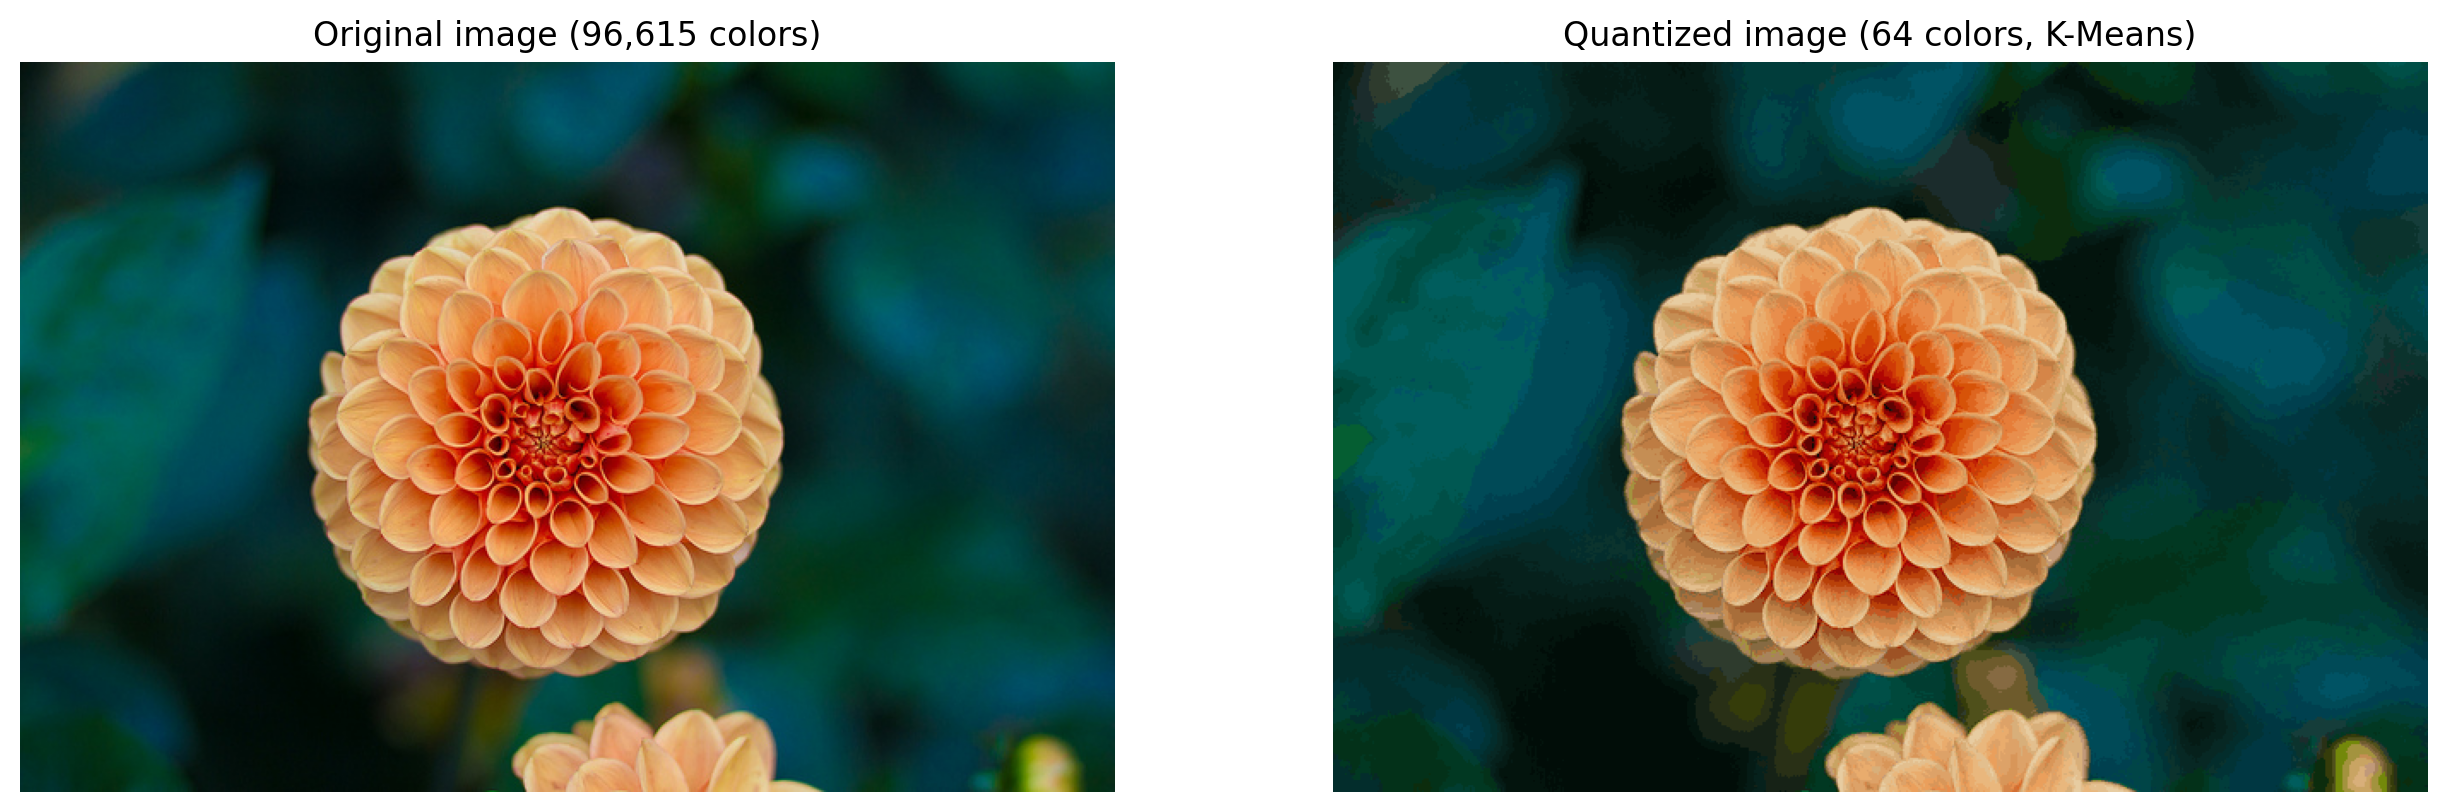

In [7]:
fig2

It seems almost impossible that the image on the left has 96,615 unique colors, while the one on the right has only 64 unique colors!

The vector quantization procedure by K-Means clustering is very simple. We need to replace each field value $\mathbf{y}_n$ (for example, in a grayscale image each coordinate $\mathbf{x}_n$ is a pixel location, and the field value is a number between 0 and 255) with the index $u_n \in \{1,..., K\}$ of a **codebook** with the mean value of that field in the cluster of points (pixels) $\boldsymbol{\mu}_k \in \mathbb{R}^D$.

So, in that case the input for K-Means clustering becomes the field value $\mathbf{y}_n$ and its similarity to the mean of the cluster is still the Euclidean distance:

$$u_n^* = \underset{k}{\mathrm{argmin}}\lVert \mathbf{y}_n - \boldsymbol{\mu}_k \rVert^2_2$$

$$\boldsymbol{\mu}_k = \frac{1}{N_k} \sum_{n:u_n=k} \mathbf{y}_n$$

Now the clusters are not contiguous (i.e. each point can be disconnected from its neighbors). You can see this very easily if you just use 2 clusters (i.e. 2 colors) to quantize the above image. Try it!

* Try visualizing the image for a growing number of clusters, for example: 2, 4, 16, 256
    * Note that for 256 clusters you may need to wait a few seconds.

**Vector quantization** has far reaching implications in many other fields, including Engineering!

* In a [paper](https://www.sciencedirect.com/science/article/abs/pii/S0045782516301499) with **Zeliang Liu** and my PhD advisor, we used K-Means clustering to compress finite element meshes into $K$ clusters that have similar elasticity behavior (similar strain concentration tensor). This allows to dramatically compress the number of finite elements to $K$ clusters, leading to very fast material simulations using a method we created called **Self-consistent clustering analysis** (SCA).

    * **Bernardo Ferreira** further developed the method to include adaptivity and also wrote a fully documented open source code (CRATE): [see CRATE documentation](https://bessagroup.github.io/CRATE/index.html)

### Hyperparameter optimization (choosing the number of clusters $K$)

Assessing the performance of (deterministic) unsupervised learning methods is quite tricky in general...

Unlike supervised learning techniques, minimizing the reconstruction error is not a very useful metric because we known that **the reconstruction error goes down as we increase the number of clusters** (larger $K$) until we have the same number of clusters as the number of data points... We made this comment also in the PCA lecture, where we simply mentioned that one can look for the "**kink**" or "**elbow**" of such curve. (Also see the note below)

If we view K-Means clustering as a special case of a probabilistic model, called Gaussian Mixture Model, then we can use Bayesian model selection and evaluate the log marginal likelihood to determine the number of clusters $K$... But today we will not go Bayesian...

NOTE: The following distortion metric (reconstruction error) is **not** a typical way to choose the number of clusters $K$.

$$
\text{err}(\mathcal{D}_{\text{valid}}, K) - \frac{1}{\mathcal{D}_{\text{valid}}} \sum_{n\in \mathcal{D}_{\text{valid}}} \lVert \mathbf{x}_n - \mathbf{x}_n^* \rVert^2
$$

So, what do we do?

* A common heuristic method for choosing $K$ is to calculate the **silhouette score**.

The **silhouette score** is the mean of the **silhouette coefficients** of each cluster.

The **silhouette coefficient** of a point $i$ is simply defined as:

$$
\text{sc}(i) = \frac{b_i-a_i}{\max (a_i,b_i)}
$$

where $a_i$ is the distance from the center of the closest cluster $k_i$ to the point $\mathbf{x}_i$, where the cluster $k_i$ is found as usual: $k_i =  \underset{k}{\mathrm{argmin}}\lVert \mathbf{x}_i - \boldsymbol{\mu}_k \rVert^2_2$

and where $b_i$ is the distance from the center of the next closest cluster $k_i'$ to the same point $\mathbf{x}_i$, where $k_i'$ is determined as: $k_i' =  \underset{k\neq k_i}{\mathrm{argmin}}\lVert \mathbf{x}_i - \boldsymbol{\mu}_k \rVert^2_2$

Then, the silhouette score is simply the mean of all silhouette coefficients (note that there are $N$ silhouette coefficients, as that is the number of points $\mathbf{x}_n$ in the dataset where $n=1,...,N$).

It can be instructive to look at a plot of all the silhouette coefficients for the Iris dataset, considering we do K-Means clustering with 2, 3, 4, or 5 clusters.

In [8]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5]

# Create a figure with subplots whose rows are for a given cluster number and the 2 columns show the results
fig3, ax3 = plt.subplots(len(range_n_clusters), 2, figsize=(24,14)) # This opens a new figure
#fig3.set_size_inches(18, 7)

for index, n_clusters in enumerate(range_n_clusters):

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax3[index, 0].set_xlim([-0.1, 1])
    ax3[index, 0].set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax3[index, 0].set_ylim([0, len(X_data_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_data_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_data_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X_data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax3[index, 0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax3[index, 0].text(+0.02, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax3[index, 0].set_title("The silhouette plot for K-Means with %d clusters"
                            % n_clusters,
                            fontweight="bold")
    ax3[index, 0].set_xlabel("The silhouette coefficient values")
    ax3[index, 0].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax3[index, 0].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax3[index, 0].set_yticks([])  # Clear the yaxis labels / ticks
    #ax3[index, 0].set_xticks([0, 1])
    ax3[index, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    
    #plt.close(fig[n_clusters])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax3[index, 1].scatter(
        X_data_scaled[:, 0], X_data_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax3[index, 1].scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax3[index, 1].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax3[index, 1].set_title("The visualization of the clustered data for K-Means with %d clusters"
                            % n_clusters,
                            fontweight="bold")
    ax3[index, 1].set_xlabel("$X_1$")
    ax3[index, 1].set_ylabel("$X_2$")
    ax3[index, 1].set_xticks([])  # Clear the xaxis labels / ticks
    ax3[index, 1].set_yticks([])  # Clear the yaxis labels / ticks

plt.tight_layout()
plt.close(fig3)

For n_clusters = 2 The average silhouette_score is : 0.580184463257396
For n_clusters = 3 The average silhouette_score is : 0.45542721937148334
For n_clusters = 4 The average silhouette_score is : 0.38724679456128813
For n_clusters = 5 The average silhouette_score is : 0.345972967262151


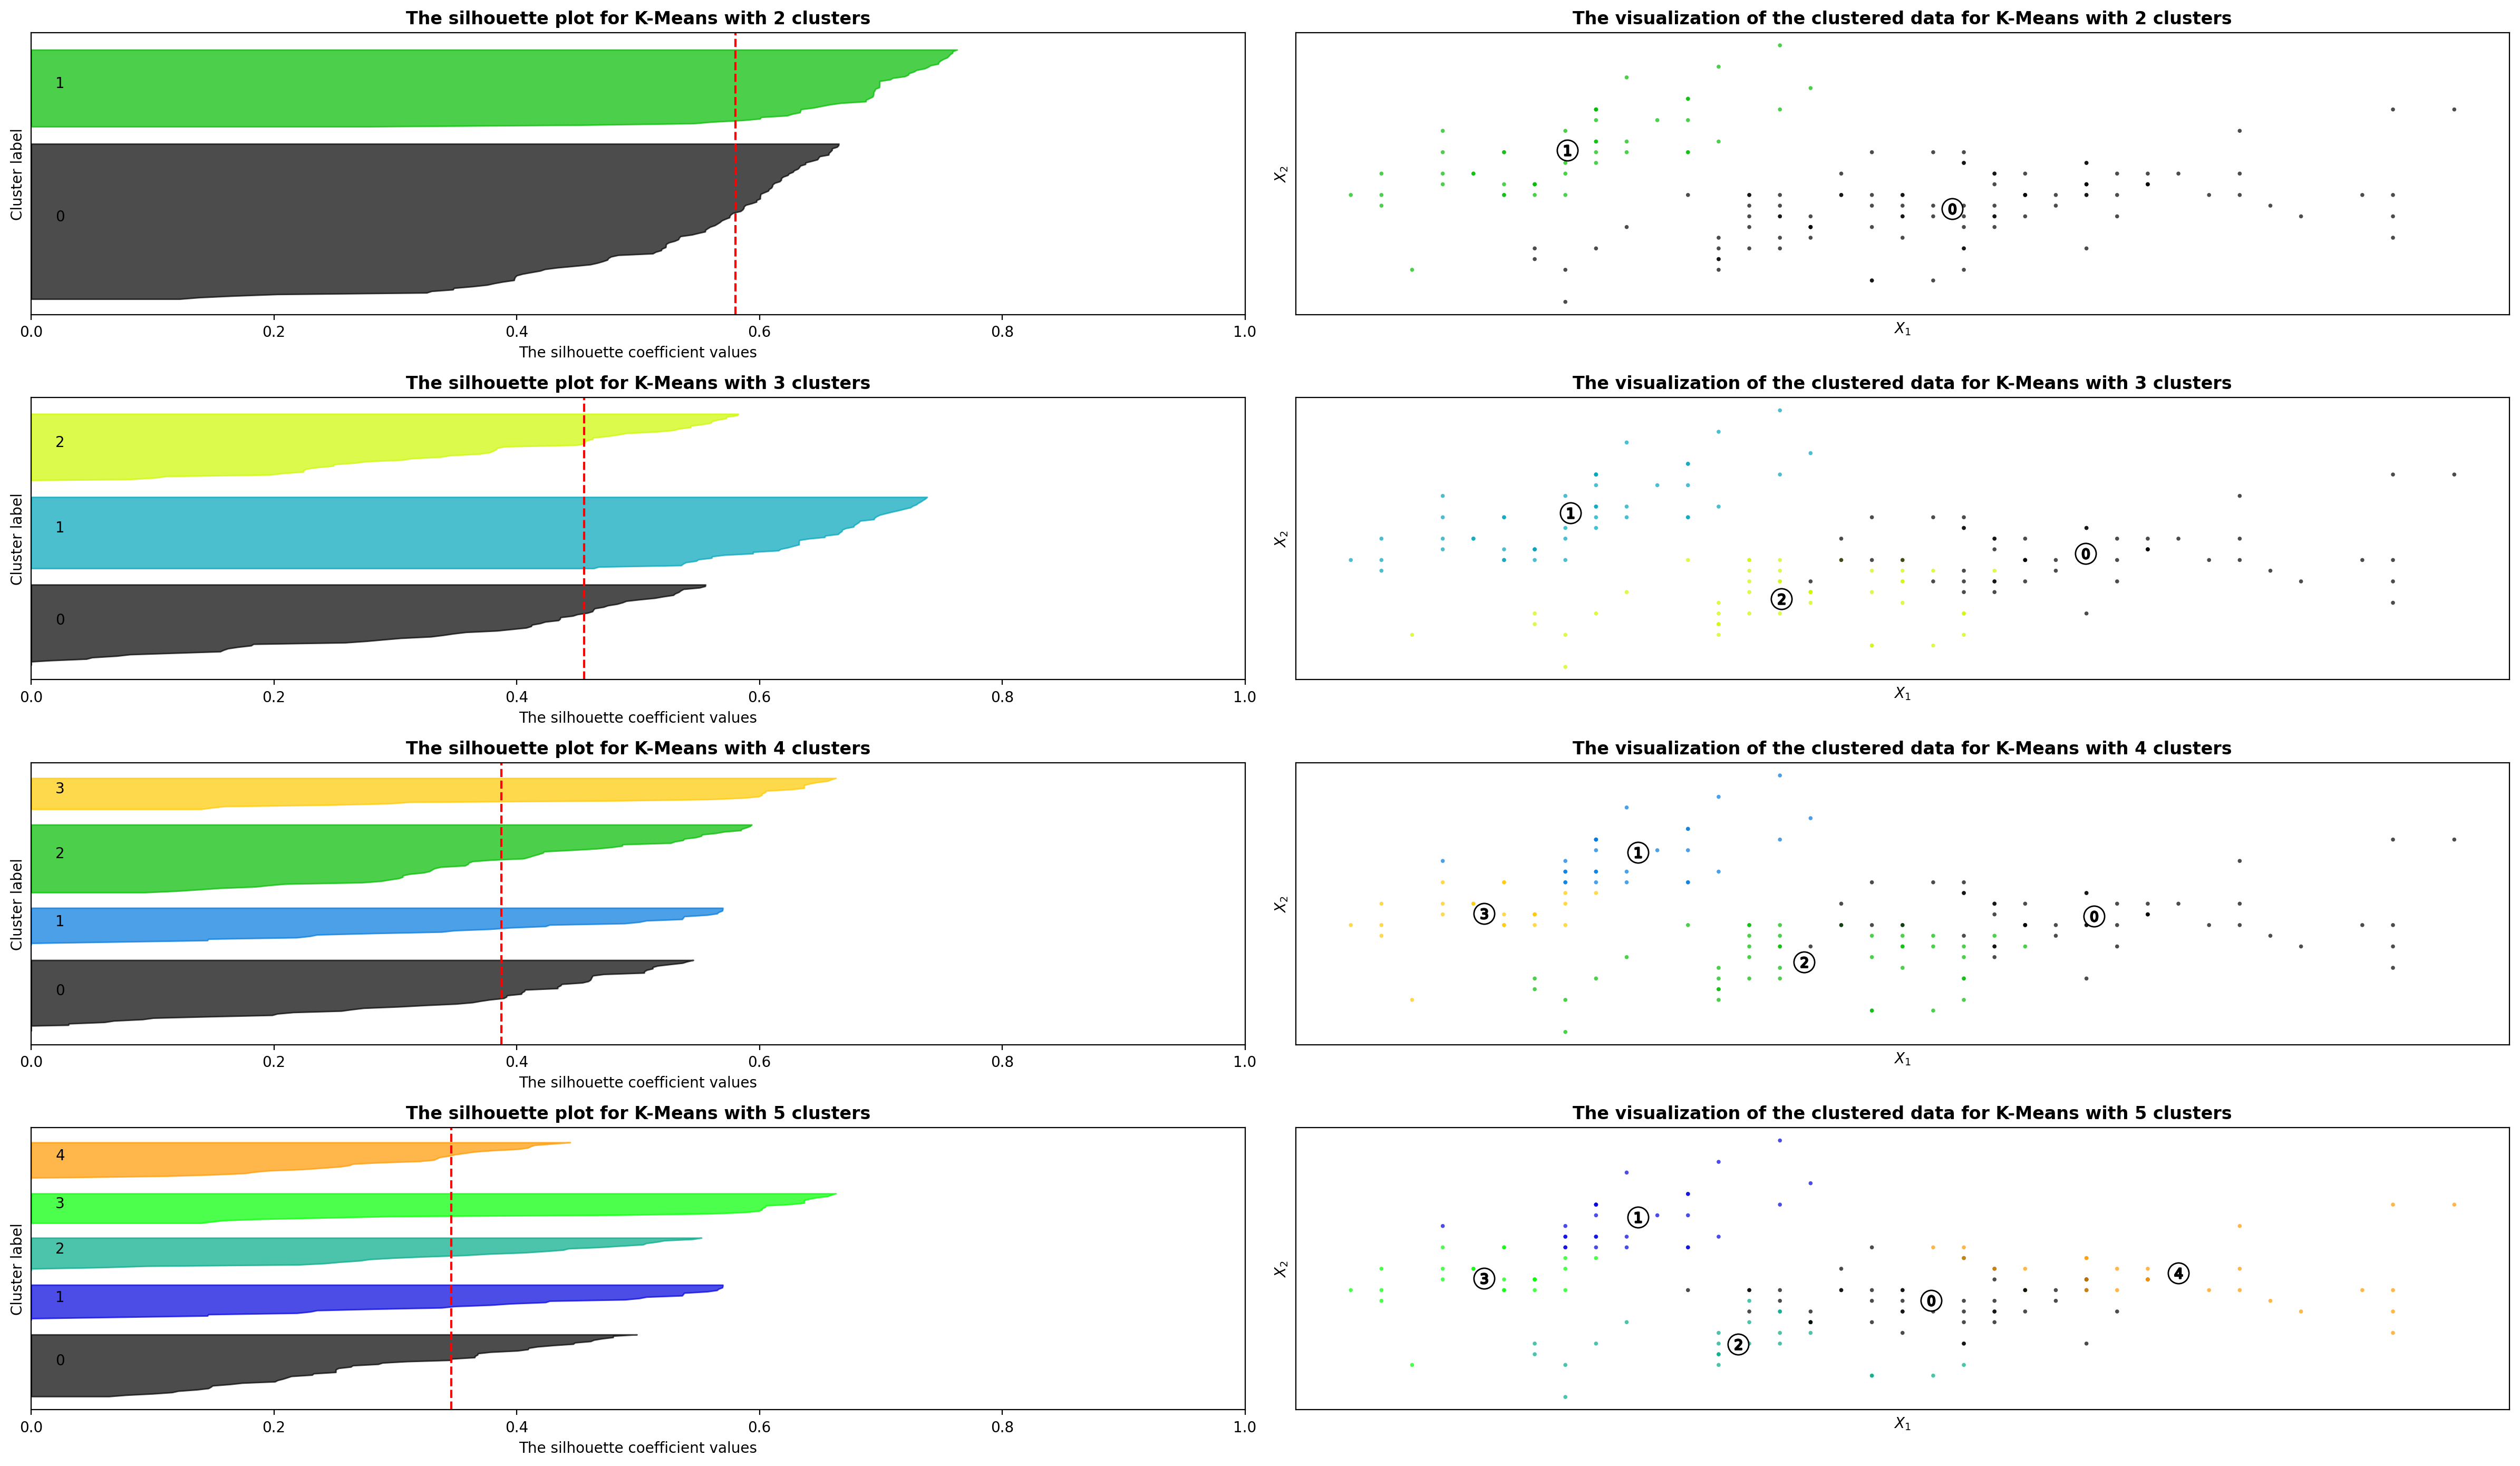

In [9]:
fig3

The above plot is called the **silhouette diagram** and it is useful in clustering!

In this example (Iris dataset), the above silhouette diagram suggests that:

* We should choose 2 clusters, as the silhouette score is larger
    * Unfortunately, we know that the correct answer is 3 clusters (3 flower types!).
    
Another interesting aspect of the silhouette diagram is that it tells us about the size of each cluster even for high dimensional data (remember that we have 4 features, but the second column of the plot only visualizes 2 of them).
* The information of the size of each cluster is simply given by the vertical width of each colored part of the silhouette diagram (the y-axis corresponds to the number of points we have in each cluster)

### See you next class

Have fun!

```python
np.random.seed(1987)
# Let's train the K-Means clustering algorithm (same code we used in the beginning of this Lecture)

n_clstrs = 2 # Choose the number of clusters you want to create (hyperparameter)

k_means_model_ex1 = KMeans(n_clusters=n_clstrs)

k_means_model_ex1.fit(X_data_scaled)

labels = k_means_model_ex1.labels_ # the predicted label for each data point (cluster to which that point belongs)

#
# Let's train PCA to reduce the original 4D inputs to 3D latent features (same code we used in Lecture 32)
from sklearn.decomposition import PCA # import PCA

pca_model_ex1 = PCA(n_components=3) # Reduce input data to 3 components (instead of the original 4)

pca_model_ex1.fit(X_data_scaled) # Determine the parameters of the PCA model

U_data = pca_model_ex1.transform(X_data_scaled) # Get the low dimensional data embedding U_nl

#
# Plot the K-Means clustering points in latent space
fig_ex1, ax1 = plt.subplots() # This opens a new figure
plt.clf() # clear the figure (otherwise it plots 2D axis)
ax_ex1 = fig_ex1.add_subplot(1, 2, 1, projection="3d", elev=48, azim=134) # Create 3D axes

cm = plt.colormaps['RdYlBu'] # use a particular color map for this plot to highlight that
                               # the colors associated to the labels don't have meaning
    
ax_ex1.scatter(U_data[:, 0], U_data[:, 1], U_data[:, 2], c=labels.astype(float), cmap=cm)

ax_ex1.xaxis.set_ticklabels([])
ax_ex1.yaxis.set_ticklabels([])
ax_ex1.zaxis.set_ticklabels([])
ax_ex1.set_xlabel("$u_1$")
ax_ex1.set_ylabel("$u_2$")
ax_ex1.set_zlabel("$u_3$")
ax_ex1.set_title("K-Means on Iris dataset inputs (%1i clusters)" % n_clstrs)

#
# Plot the data in the PCA latent space (including the correct labels)
Data_y = iris_data.loc[:, 'Species'] # collect the labels from the dataset (now we are using information
                                     # we were not supposed to know when doing unsupervised learning!)
y_strings_data = Data_y.values # save the label data strings into Y_strings_data
y_data = pd.Categorical(pd.factorize(y_strings_data)[0]) # convert to integers

ax1_ex1 = fig_ex1.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134) # Create 3D axes

cm2 = plt.colormaps['viridis'] # use a different color map for this plot to highlight that
                               # the colors associated to the labels don't have meaning

ax1_ex1.scatter(U_data[:, 0], U_data[:, 1], U_data[:, 2], c=y_data, cmap=cm2)
ax1_ex1.xaxis.set_ticklabels([])
ax1_ex1.yaxis.set_ticklabels([])
ax1_ex1.zaxis.set_ticklabels([])
ax1_ex1.set_xlabel('$u_1$')
ax1_ex1.set_ylabel('$u_2$')
ax1_ex1.set_zlabel('$u_3$')
ax1_ex1.set_title('Iris dataset shown in latent space')

plt.show()
```